# Stock Price Analysis: Novo vs Eli Lilly

This notebook retrieves and analyzes stock price data for Novo Nordisk (NVO) and Eli Lilly (LLY) from Yahoo Finance.

## 1. Import Required Libraries

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Set up the display options
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Fetch Novo Stock Data

In [7]:
# Define date range (1 year of data)
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

# Fetch Novo Nordisk stock data
nvo = yf.download('NVO', start=start_date, end=end_date, progress=False)
nvo_info = yf.Ticker('NVO').info

print(f"Novo Nordisk (NVO)")
print(f"Company Name: {nvo_info.get('longName', 'N/A')}")
print(f"Data Points: {len(nvo)}")
print(f"Date Range: {nvo.index.min().date()} to {nvo.index.max().date()}")
print(f"\nFirst 5 rows:")
print(nvo.head())

Novo Nordisk (NVO)
Company Name: Novo Nordisk A/S
Data Points: 251
Date Range: 2025-02-21 to 2026-02-20

First 5 rows:
Price      Close  High   Low  Open    Volume
Ticker       NVO   NVO   NVO   NVO       NVO
Date                                        
2025-02-21 85.72 86.84 83.44 86.02  15128800
2025-02-24 88.16 88.68 85.76 86.48  10476300
2025-02-25 88.51 91.28 86.61 89.80  11465900
2025-02-26 87.15 88.68 86.89 88.59   7387800
2025-02-27 86.83 87.77 86.53 86.56   6953800


## 3. Fetch Eli Lilly Stock Data

In [ ]:
# Fetch Eli Lilly stock data
lly = yf.download('LLY', start=start_date, end=end_date, progress=False)
lly_info = yf.Ticker('LLY').info

print(f"Eli Lilly (LLY)")
print(f"Company Name: {lly_info.get('longName', 'N/A')}")
print(f"Data Points: {len(lly)}")
print(f"Date Range: {lly.index.min().date()} to {lly.index.max().date()}")
print(f"\nFirst 5 rows:")
print(lly.head())

Fetching Eli Lilly (LLY) data...
Eli Lilly (LLY)
Company Name: Eli Lilly and Company
Data Points: 251
Date Range: 2025-02-21 to 2026-02-20

First 5 rows:
Price       Close   High    Low   Open   Volume
Ticker        LLY    LLY    LLY    LLY      LLY
Date                                           
2025-02-21 867.26 887.83 867.01 874.15  3940400
2025-02-24 874.92 886.55 863.63 872.83  3017100
2025-02-25 895.17 905.30 884.19 884.19  5111300
2025-02-26 908.28 915.65 890.01 891.77  3032800
2025-02-27 898.51 918.70 897.42 908.99  3085400


## 4. Combine and Display Data

In [11]:
# Combine the closing prices into a single DataFrame
try:
    # Ensure both datasets are available and have data
    if nvo is None or nvo.empty or lly is None or lly.empty:
        raise ValueError("One or both stock datasets are empty. Please run the data fetch cells first.")
    
    # Create DataFrame with proper index alignment
    combined_df = pd.DataFrame(index=nvo.index.union(lly.index))
    combined_df['NVO'] = nvo['Close']
    combined_df['LLY'] = lly['Close']
    
    # Remove any rows with NaN values if indices don't align perfectly
    combined_df = combined_df.dropna()
    
    if combined_df.empty:
        raise ValueError("Combined dataframe is empty. Stock date ranges may not overlap.")
    
    # Display summary statistics
    print("Summary Statistics - Last 1 Year")
    print("="*60)
    print("\nNovo Nordisk (NVO):")
    print(f"  Current Price: ${combined_df['NVO'].iloc[-1]:.2f}")
    print(f"  Average Price: ${combined_df['NVO'].mean():.2f}")
    print(f"  Min Price: ${combined_df['NVO'].min():.2f}")
    print(f"  Max Price: ${combined_df['NVO'].max():.2f}")
    print(f"  Return (%): {((combined_df['NVO'].iloc[-1] / combined_df['NVO'].iloc[0]) - 1) * 100:.2f}%")
    
    print("\nEli Lilly (LLY):")
    print(f"  Current Price: ${combined_df['LLY'].iloc[-1]:.2f}")
    print(f"  Average Price: ${combined_df['LLY'].mean():.2f}")
    print(f"  Min Price: ${combined_df['LLY'].min():.2f}")
    print(f"  Max Price: ${combined_df['LLY'].max():.2f}")
    print(f"  Return (%): {((combined_df['LLY'].iloc[-1] / combined_df['LLY'].iloc[0]) - 1) * 100:.2f}%")
    
    print("\n\nRecent Data (Last 5 Days):")
    print(combined_df.tail())
except Exception as e:
    print(f"Error combining data: {e}")
    print("Please ensure both NVO and LLY data have been successfully fetched.")

Summary Statistics - Last 1 Year

Novo Nordisk (NVO):
  Current Price: $47.42
  Average Price: $60.45
  Min Price: $43.34
  Max Price: $88.51
  Return (%): -44.68%

Eli Lilly (LLY):
  Current Price: $1014.47
  Average Price: $856.74
  Min Price: $622.32
  Max Price: $1108.09
  Return (%): 16.97%


Recent Data (Last 5 Days):
             NVO     LLY
Date                    
2026-02-13 49.57 1040.00
2026-02-17 49.37 1036.05
2026-02-18 49.23 1020.56
2026-02-19 48.45 1023.22
2026-02-20 47.42 1014.47


## 5. Visualize Stock Prices

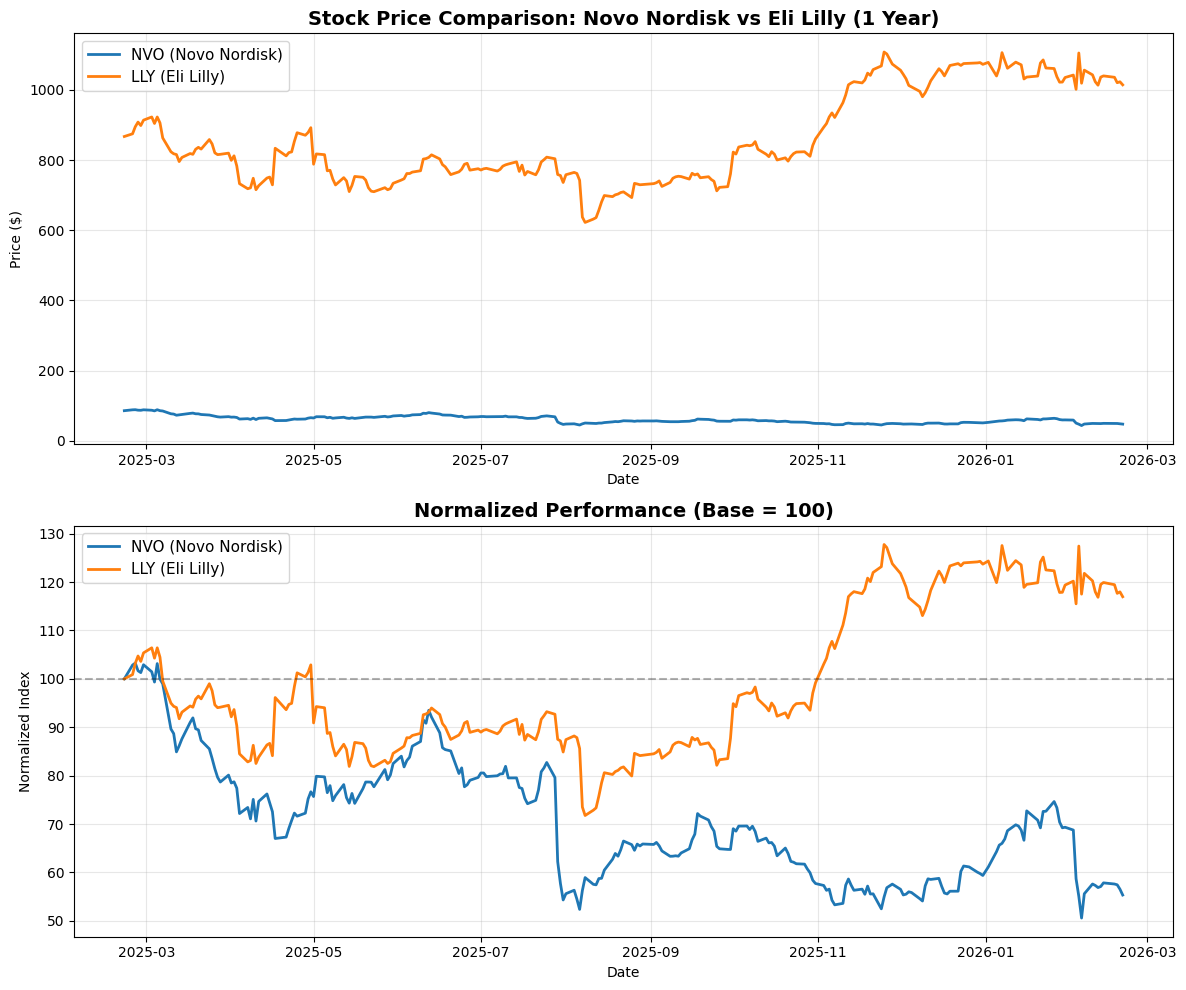

Visualization complete!


In [12]:
# Create visualizations
try:
    if combined_df is None or combined_df.empty:
        raise ValueError("No data available to visualize. Please run the data fetch and combine cells first.")
    
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))
    
    # Plot 1: Closing prices comparison
    axes[0].plot(combined_df.index, combined_df['NVO'], label='NVO (Novo Nordisk)', linewidth=2, color='#1f77b4')
    axes[0].plot(combined_df.index, combined_df['LLY'], label='LLY (Eli Lilly)', linewidth=2, color='#ff7f0e')
    axes[0].set_title('Stock Price Comparison: Novo Nordisk vs Eli Lilly (1 Year)', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Price ($)')
    axes[0].legend(fontsize=11)
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Normalized performance (base = 100)
    nvo_normalized = (combined_df['NVO'] / combined_df['NVO'].iloc[0]) * 100
    lly_normalized = (combined_df['LLY'] / combined_df['LLY'].iloc[0]) * 100
    
    axes[1].plot(combined_df.index, nvo_normalized, label='NVO (Novo Nordisk)', linewidth=2, color='#1f77b4')
    axes[1].plot(combined_df.index, lly_normalized, label='LLY (Eli Lilly)', linewidth=2, color='#ff7f0e')
    axes[1].axhline(y=100, color='black', linestyle='--', alpha=0.3)
    axes[1].set_title('Normalized Performance (Base = 100)', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Normalized Index')
    axes[1].legend(fontsize=11)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("Visualization complete!")
except Exception as e:
    print(f"Error creating visualization: {e}")
    print("Please ensure the data has been successfully fetched and combined.")

## 6. Correlation Analysis

In [ ]:
import seaborn as sns

try:
    if combined_df is None or combined_df.empty:
        raise ValueError("No data available for correlation analysis.")
    
    # Calculate correlation matrix
    correlation_matrix = combined_df.corr()
    
    print("Correlation Matrix:")
    print(correlation_matrix)
    print(f"\nPearson Correlation between NVO and LLY: {correlation_matrix.loc['NVO', 'LLY']:.4f}")
    
    # Create correlation heatmap
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=1, cbar_kws={"shrink": 0.8},
                vmin=-1, vmax=1, fmt='.4f', ax=ax)
    ax.set_title('Correlation Matrix: Novo vs Eli Lilly', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Calculate daily returns and their correlation
    nvo_returns = combined_df['NVO'].pct_change()
    lly_returns = combined_df['LLY'].pct_change()
    returns_corr = nvo_returns.corr(lly_returns)
    
    print(f"\nPearson Correlation of Daily Returns: {returns_corr:.4f}")
    
except Exception as e:
    print(f"Error creating correlation plot: {e}")
    print("Please ensure the data has been successfully fetched and combined.")